# 파이썬 기반의 AI를 위한 기초수학, 확률및통계

In [1]:
## 강봉주 
## bonjour.kang@gmail.com
##
## 확률과 확률 변수
##

In [2]:
# 필요한 패키지
import numpy as np
import scipy
from scipy import linalg as la
import matplotlib.pyplot as plt

import scipy.stats as ss
import sympy

# 한글출력
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

scipy.__version__

'1.3.2'

## 확률 밀도 함수

In [3]:
# 예제: 이산형 확률 밀도 함수
# 이항 분포
# 4번 시행에서 성공확률이 1/2인 경우
# 𝐴={0, 1, 2}의 확률을 계산해보자

In [4]:
# 해답
import scipy.special
A = [0, 1, 2]
trials = 4
event_prob = 1/2
np.sum(scipy.special.comb(trials, A) * event_prob ** trials)

0.6875

In [5]:
x = sympy.Symbol('x')
PA = sympy.integrate(sympy.exp(-x), (x, 0, sympy.oo))
PA

1

In [6]:
# 특정 이벤트의 확률 구하기
x = sympy.Symbol('x')
PA = sympy.integrate(sympy.exp(-x), (x, 0, 1))
PA

1 - exp(-1)

In [7]:
# 예제: 균등 분포의 분포함수
# 1) 구간 [0, 1]에서 정의된 균등 분포의 분포 함수를
# 정의하세요
# 2) 분포 함수를 x값에 따른 그래프를 그리세요

In [8]:
# 해답
#1)
a, b, x = sympy.symbols('a, b, x')
x = sympy.Symbol('x')
F = sympy.Lambda((x, a, b), x/(b-a))
F(x, 0, 1)

x

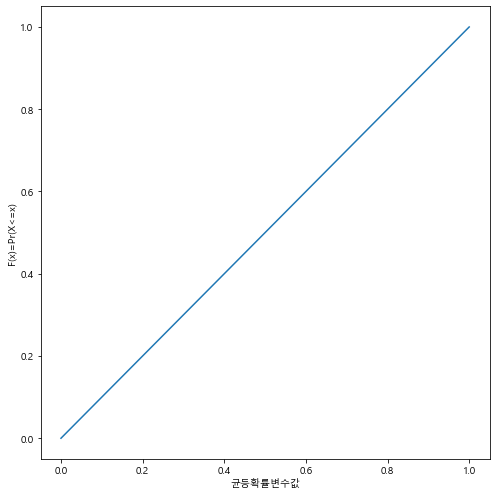

In [9]:
# 2)
x = np.linspace(0,1, 100)
cdf_x = x

fig, ax = plt.subplots(figsize=(7,7))
ax.plot(x, cdf_x)
ax.set_xlabel("균등확률변수값")
ax.set_ylabel("F(x)=Pr(X<=x)")

plt.tight_layout()

In [10]:
# 균등 분포의 기대값 구하기
x = sympy.Symbol('x')
mu = sympy.integrate(x*1/2, (x, -1, 1))
mu

0

In [11]:
# 분산 구하기
EX2 = sympy.integrate(x**2*1/2, (x, -1, 1))
EX2

1/3

In [12]:
sigma2 = EX2 - mu**2
sigma2

1/3

In [13]:
sigma = sympy.sqrt(sigma2)
sigma

sqrt(3)/3

In [14]:
# 기대값
import sympy

a, b, x = sympy.symbols('a, b, x')
mu = sympy.integrate(x/(b-a), (x, a, b))
mu.simplify().together()

(a + b)/2

In [15]:
# 제곱 기대값
EX2 = sympy.integrate(x**2/(b-a), (x, a, b))
EX2.simplify().factor()

(a**2 + a*b + b**2)/3

In [16]:
# 분산 계산
sigma2 = EX2 - mu**2
sigma2.simplify().factor()

(a - b)**2/12

In [17]:
# 적률 함수를 이용한 평균, 분산 구하기
mu, sigma, t = sympy.symbols('mu, sigma, t')
m_gen= sympy.exp(mu*t + (sigma**2 * t**2)/2)
# 1차 적률 구하기
m_gen.diff(t)

(mu + sigma**2*t)*exp(mu*t + sigma**2*t**2/2)

In [18]:
# 1차 적률: t=0
m_gen_func = sympy.Lambda(t, m_gen.diff(t))
EX = m_gen_func(0)
EX

mu

In [19]:
# 2차 적률 구하기
m_gen.diff(t, 2)

(sigma**2 + (mu + sigma**2*t)**2)*exp(t*(mu + sigma**2*t/2))

In [20]:
m_gen_func = sympy.Lambda(t, m_gen.diff(t, 2))
# 2차 적률: t=0
EX2 = m_gen_func(0)
EX2

mu**2 + sigma**2

In [21]:
# 분산
EX2 - EX**2

sigma**2